<a href="https://colab.research.google.com/github/PhilChenn/Computer-Vision/blob/main/homework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 3

### Problem 0 (3 points)

## Part 1: Line Search 

### Problem 1.1 (Exam Style)

### Problem 1.2 (Exam Style)

### Problem 1.3 (Exam Style)

### Problem 1.4 (Exam Style)

### Problem 1.5 (Exam Style)

## Part 2: Automatic Differentiation

In [ ]:
import autograd.numpy as np
from autograd import grad, jacobian

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
def banana(z):
    return np.array(100 * (z[1] - z[0] ** 2) ** 2 + (1 - z[0]) ** 2)

### Problem 2.1

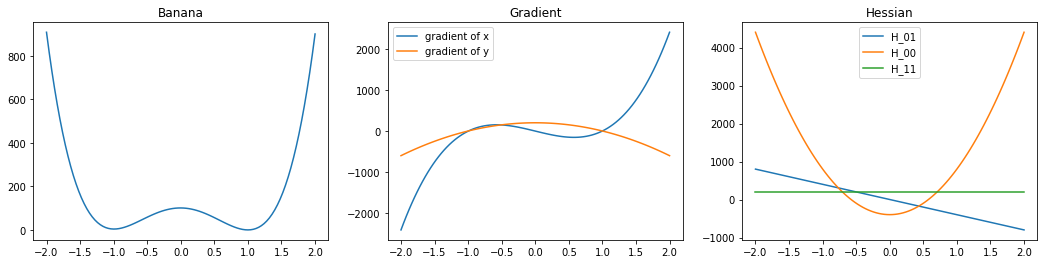

In [ ]:
g = grad(banana)

def banana_gradient(z):
    return g(z)

def banana_hessian(z):
    j = jacobian(g)
    return j(z)

# Problem 2.1

z0 = np.linspace(-2., 2., 101)
gradients = [banana_gradient(np.array([z_0,1])) for z_0 in z0]
Hessians = [banana_hessian(np.array([z_0,1])) for z_0 in z0]

plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
plt.plot(z0, [banana(np.array([z_0,1])) for z_0 in z0], label='banana')
plt.title('Banana')
plt.subplot(1,3,2)
plt.plot(z0, [gradient[0] for gradient in gradients], label='gradient of x')
plt.plot(z0, [gradient[1] for gradient in gradients], label="gradient of y")
plt.legend()
plt.title('Gradient')
plt.subplot(1,3,3)
plt.plot(z0, [hessian[0,1] for hessian in Hessians], label='H_01')
plt.plot(z0, [hessian[0,0] for hessian in Hessians], label='H_00')
plt.plot(z0, [hessian[1,1] for hessian in Hessians], label='H_11')
plt.title('Hessian')
plt.legend()
plt.show()

### Problem 2.2 (Exam style except for the function calls)

In [ ]:
grad_origin = banana_gradient(np.array([0.,0.]))
Hessian_origin = banana_hessian(np.array([0.,0.]))

print(grad_origin)
print(Hessian_origin)

# not stationary point
# convex

[-2.  0.]
[[  2.   0.]
 [  0. 200.]]


## Part 3: Gradient Descent

In [ ]:
from scipy import optimize
from numpy import linalg as npl


def line_search(f, g, z0, f0, g0, state=None):
    outcome = optimize.line_search(f, g, z0, -g0, g0, f0)
    alpha, f1 = outcome[0], outcome[3]
    evaluations = outcome[1]
    if alpha is None:
        alpha, f1 = 0., f0
    z1 = z0 - g0 * alpha
    return z1, f1, evaluations, state

In [ ]:
def gd(f, g, z0, step_function=line_search, state=None, max_evaluations=1000,
       min_step=1.e-8, min_gradient=1.e-6):
    evaluations, h = 0, []
    while True:
        f0, g0 = f(z0), g(z0)
        if not len(h):
            h.append((z0, f0))
        evaluations += 1
        if npl.norm(g0) < min_gradient:
            z1, f1 = z0, f0
            break
        z1, f1, n_eval, state = step_function(f, g, z0, f0, g0, state=state)
        evaluations += n_eval
        h.append((z1, f1))
        if npl.norm(z1 - z0) < min_step or evaluations > max_evaluations:
            break
        z0 = z1
    return z1, f1, evaluations, h

In [ ]:
def momentum(f, g, z0, f0, g0, state=None):
    if state is None:
        state = {'alpha': 0.001, 'v0': 0., 'mu': 0.9}
    v1 = state['mu'] * state['v0'] - g0 * state['alpha']
    z1 = z0 + v1
    state['v0'] = v1
    return z1, f(z1), 1, state

### Problem 3.1

In [ ]:
def fixed(f, g, z0, f0, g0, state=None):
    if state is None:
        fixed_state = {'alpha': 0.001, 'v0': 0., 'mu': 0}
    else:
        fixed_state = {'alpha': state['alpha'],  'v0': 0., 'mu': 0}
    return momentum(f, g, z0, f0, g0, state=fixed_state)

In [ ]:
z_0 = np.array((-1.2, 1.))
z_star = np.array([1., 1.])

In [ ]:
steps = ((line_search, None), (fixed, {'alpha': 0.001}), (fixed, {'alpha': 0.005}),
          (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.2}),
          (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.5}),
          (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.95}))

In [ ]:
from numpy import array2string


def plot_contours(f, z_ast, rect):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    n = 101
    xs = np.linspace(rect[0], rect[1], n)
    ys = np.linspace(rect[2], rect[3], n)
    fs = np.array([[f(np.array([x, y])) for x in xs] for y in ys])
    plt.contour(xs, ys, fs, 20, colors='grey', linewidths=1)
    plt.plot(z_ast[0], z_ast[1], 'ro')
    plt.axis('scaled')


def fa(a, p=2):
    return array2string(np.array(a), precision=p, separator=', ')

In [ ]:
def plot_history_path(h, f, z_ast, n_evals, state, rect=(-2., 2., -2., 2.)):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    plot_contours(f, z_ast, rect)
    plt.plot([p[0][0] for p in h], [p[0][1] for p in h])
    plt.plot(h[0][0][0], h[0][0][1], 'bo')
    z_last, f_last = h[-1][0], h[-1][1]
    ft = 'f({}) = {:.2g}; {} steps; {} evals'
    title = ft.format(fa(z_last), f_last, len(h), n_evals)
    if state is not None:
        s = state.copy()
        try:
            del s['v0']
        except KeyError:
            pass
        st = '; '.join(['{}={:.3g}'.format(name, value) for name, value in s.items()])
        title = '\n'.join((title, st))
    plt.title(title)

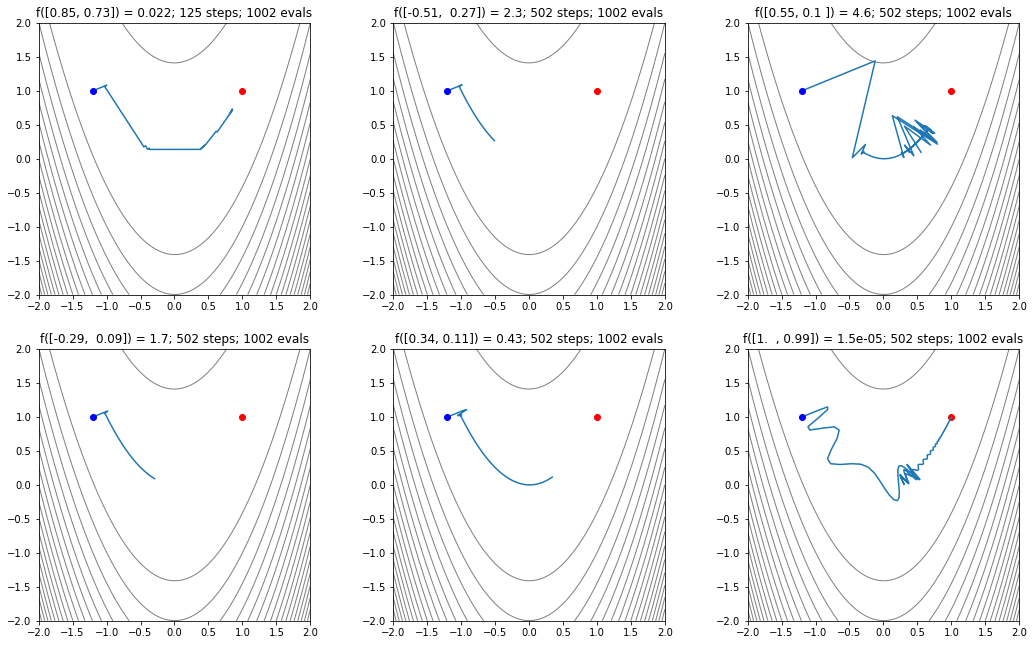

In [ ]:
plt.figure(figsize=(18, 11)) 
i = 1

for step_func, current_state in steps:
    _, _, num_evaluations, history = gd(banana, banana_gradient, z_0, step_function=step_func, state=current_state)

    plt.subplot(2,3,i)
    plot_history_path(history, banana, z_star, num_evaluations, None)
    i+=1
    
plt.show()


### Problem 3.2 (Exam Style)